In [1]:
#import packages
import os
import random
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
import skimage.morphology as morp
from skimage.filters import rank
from sklearn.metrics import confusion_matrix
import seaborn as sns
np.set_printoptions(threshold=np.inf)
from tensorflow.keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.layers import LeakyReLU

In [2]:
imgs_path = "./data/Train"
data_list = []
labels_list = []
classes_list = 43
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((30,30))
        im = np.array(im)
        data_list.append(im)
        labels_list.append(i)
data = np.array(data_list)
labels = np.array(labels_list)

 
 
Traffic Sign Images


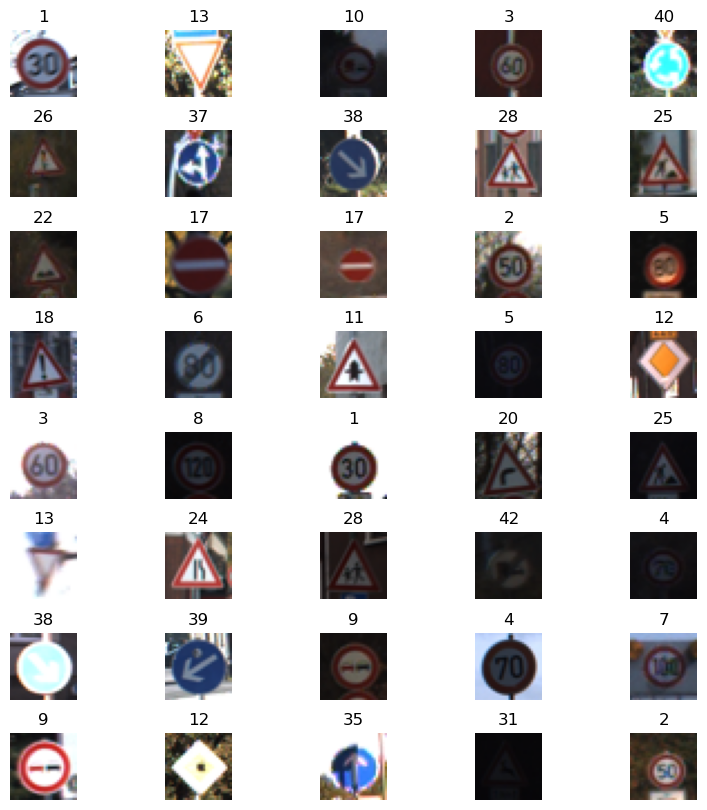

In [3]:
%matplotlib inline
print(" ")
print(" ")
print("Traffic Sign Images")
fig, axs = plt.subplots(8,5, figsize=(10, 10))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(40):
    index = random.randint(0, len(data))
    image = data[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(labels[index])

In [4]:
def gray_scale(image):
    """
    Convert images to gray scale.
        Parameters:
            image: An np.array compatible with plt.imshow.
    """
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [5]:
def local_histo_equalize(image):
    """
    Apply local histogram equalization to grayscale images.
        Parameters:
            image: A grayscale image.
    """
    kernel = morp.disk(30)
    img_local = rank.equalize(image, footprint=kernel)
    return img_local

In [6]:
def preprocess(data):
    """
    Applying the preprocessing steps to the input data.
        Parameters:
            data: An np.array compatible with plt.imshow.
    """
    gray_images = list(map(gray_scale, data))
    equalized_images = list(map(local_histo_equalize, gray_images))
    np_X = np.array(equalized_images)
    normalized_images = np_X.astype('float32')/255.0
    normalized_images = normalized_images[..., None]
    return normalized_images

In [7]:
data_preprocessed=preprocess(data)

 
 
Traffic Sign Images


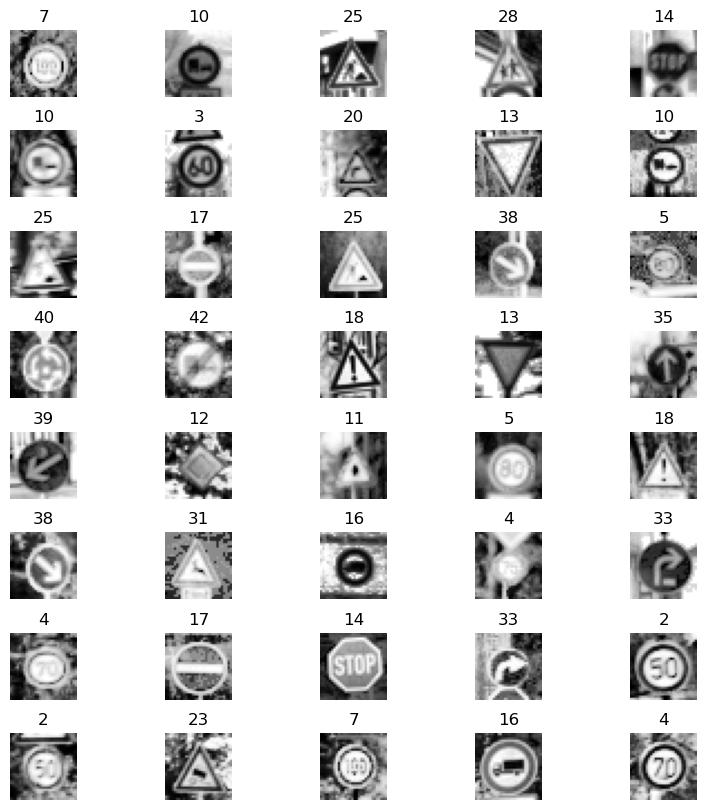

In [8]:
%matplotlib inline
print(" ")
print(" ")
print("Traffic Sign Images")
fig, axs = plt.subplots(8,5, figsize=(10, 10))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(40):
    index = random.randint(0, len(data))
    image = data_preprocessed[index]
    axs[i].axis('off')
    axs[i].imshow(image,cmap="gray")
    axs[i].set_title(labels[index])

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(data_preprocessed, labels, test_size= 0.1, random_state=10)

print("training_shape: ", x_train.shape,y_train.shape)
print("testing_shape: ", x_test.shape,y_test.shape)

y_train = tf.one_hot(y_train,43)
y_test = tf.one_hot(y_test,43)

training_shape:  (35288, 30, 30, 1) (35288,)
testing_shape:  (3921, 30, 30, 1) (3921,)


In [44]:
#building the CNN Model
model = tf.keras.Sequential()

#Adding a Convnet of 32 filters and relu activation
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape= x_train.shape[1:]))

#Adding a Convnet of 32 filters and relu activation
model.add((Conv2D(filters=32, kernel_size=(5,5), activation="relu")))

#Adding a Maxpool Layer of (2,2)
model.add(MaxPool2D(pool_size=(2,2)))

#Adding Dropout Regularization with rate= 0.25
model.add(Dropout(rate=0.25))

#Adding a Convnet of 64 filters and relu activation
model.add((Conv2D(filters=64,kernel_size=(3,3),activation="relu"))) 

#Adding a MaxPool layer of (2,2)
model.add((MaxPool2D(pool_size=(2,2))))

#Adding a Dropout Regularization with rate = 0.25
model.add(Dropout(rate=0.25))

#Flattening the Model
model.add(Flatten()) 

#Dense layer with Tanh activation
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.40))

#Final Softmax to categorize the data
model.add(Dense(43, activation="softmax")) 

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                    

In [12]:
optimizer = Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer= optimizer, metrics=["accuracy"])

In [13]:
epochs = 20
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
552/552 [==============================] - 68s 121ms/step - loss: 1.2089 - accuracy: 0.6610 - val_loss: 0.1734 - val_accuracy: 0.9546
Epoch 2/20
552/552 [==============================] - 67s 121ms/step - loss: 0.2547 - accuracy: 0.9197 - val_loss: 0.0675 - val_accuracy: 0.9829
Epoch 3/20
552/552 [==============================] - 67s 121ms/step - loss: 0.1538 - accuracy: 0.9526 - val_loss: 0.0436 - val_accuracy: 0.9883
Epoch 4/20
552/552 [==============================] - 67s 121ms/step - loss: 0.1151 - accuracy: 0.9631 - val_loss: 0.0353 - val_accuracy: 0.9918
Epoch 5/20
552/552 [==============================] - 67s 121ms/step - loss: 0.0932 - accuracy: 0.9697 - val_loss: 0.0271 - val_accuracy: 0.9931
Epoch 6/20
552/552 [==============================] - 67s 122ms/step - loss: 0.0812 - accuracy: 0.9733 - val_loss: 0.0316 - val_accuracy: 0.9921
Epoch 7/20
552/552 [==============================] - 67s 121ms/step - loss: 0.0706 - accuracy: 0.9777 - val_loss: 0.0251 - val_ac

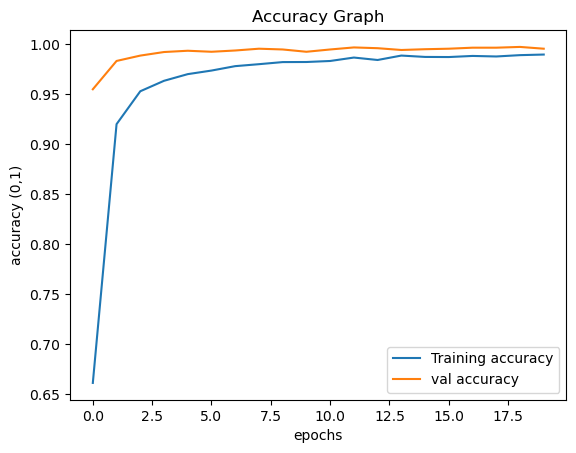

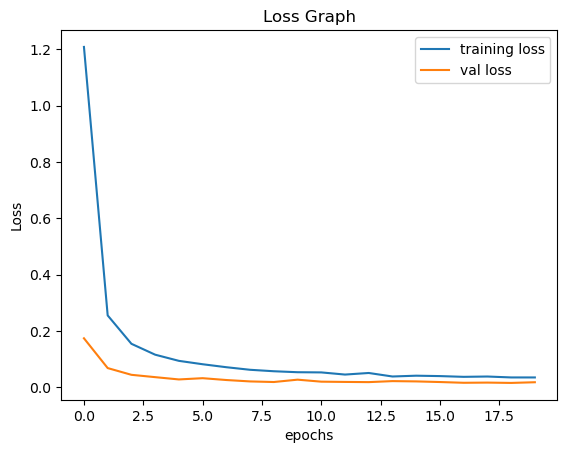

In [14]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy Graph")
plt.xlabel("epochs")
plt.ylabel("accuracy (0,1)")
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss Graph")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import accuracy_score
test = pd.read_csv("./data/Test.csv")
test_labels = test['ClassId'].values
test_img_path = "./data"
test_imgs = test['Path'].values

test_data = []
test_labels = []

for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)

import warnings
warnings.filterwarnings("ignore")
test_labels = test['ClassId'].values
test_data=preprocess(test_data)
predict_x=model.predict(test_data)
classes_x=np.argmax(predict_x,axis=1)
accuracy=accuracy_score(test_labels,classes_x)
accuracy

395/395 [==============================] - 8s 20ms/step


0.9721298495645289

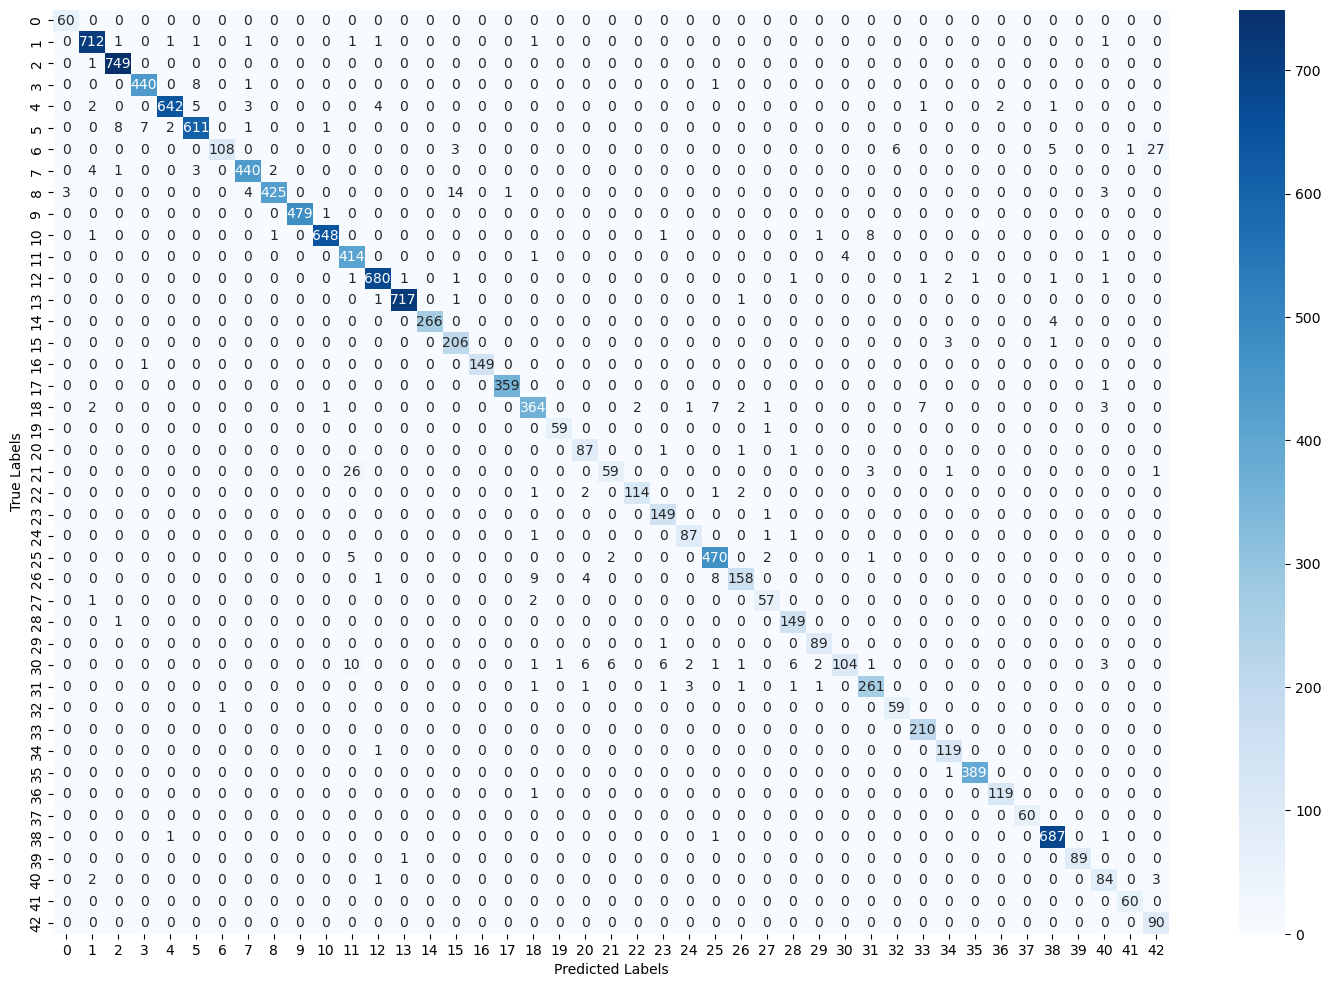

In [16]:
target_names = ['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited','No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals','Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles over 3.5 metric tons']
confusion_matrix = confusion_matrix(test_labels,classes_x)
# Set the size of the figure
plt.figure(figsize=(18, 12))

# plot the heatmap
sns.heatmap(confusion_matrix, annot=True, cmap="Blues",fmt='d')

# set plot labels
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [17]:
from sklearn.metrics import classification_report
report = classification_report(test_labels,classes_x, target_names=target_names)

# Print the classification report
print(report)

                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       0.95      1.00      0.98        60
                              Speed limit (30km/h)       0.98      0.99      0.99       720
                              Speed limit (50km/h)       0.99      1.00      0.99       750
                              Speed limit (60km/h)       0.98      0.98      0.98       450
                              Speed limit (70km/h)       0.99      0.97      0.98       660
                              Speed limit (80km/h)       0.97      0.97      0.97       630
                       End of speed limit (80km/h)       0.99      0.72      0.83       150
                             Speed limit (100km/h)       0.98      0.98      0.98       450
                             Speed limit (120km/h)       0.99      0.94      0.97       450
                                        No passing       1.00      1.00      1.

In [18]:
optimizer = Adam(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer= optimizer, metrics=["accuracy"])

In [19]:
epochs = 20
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
552/552 [==============================] - 67s 120ms/step - loss: 0.4884 - accuracy: 0.8655 - val_loss: 0.1584 - val_accuracy: 0.9513
Epoch 2/20
552/552 [==============================] - 66s 120ms/step - loss: 0.5336 - accuracy: 0.8608 - val_loss: 0.2334 - val_accuracy: 0.9306
Epoch 3/20
552/552 [==============================] - 67s 122ms/step - loss: 0.5360 - accuracy: 0.8616 - val_loss: 0.3511 - val_accuracy: 0.8873
Epoch 4/20
552/552 [==============================] - 66s 120ms/step - loss: 0.5752 - accuracy: 0.8575 - val_loss: 0.1622 - val_accuracy: 0.9549
Epoch 5/20
552/552 [==============================] - 66s 120ms/step - loss: 0.6131 - accuracy: 0.8511 - val_loss: 0.3610 - val_accuracy: 0.8921
Epoch 6/20
552/552 [==============================] - 67s 122ms/step - loss: 0.7253 - accuracy: 0.8261 - val_loss: 0.9902 - val_accuracy: 0.7256
Epoch 7/20
552/552 [==============================] - 69s 125ms/step - loss: 0.6324 - accuracy: 0.8471 - val_loss: 0.1679 - val_ac

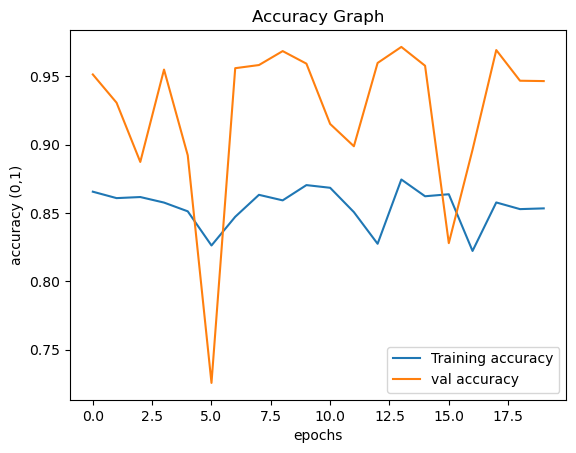

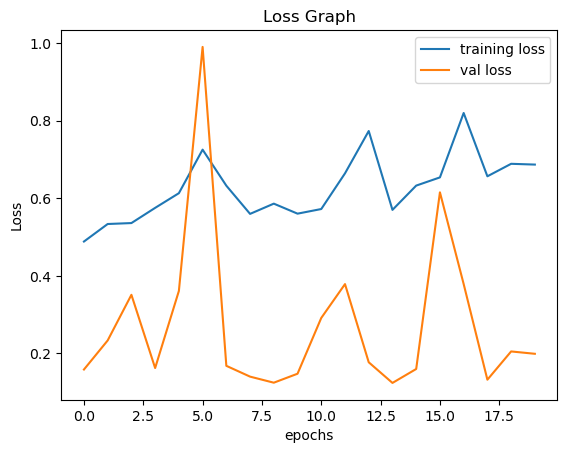

In [20]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy Graph")
plt.xlabel("epochs")
plt.ylabel("accuracy (0,1)")
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss Graph")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [21]:
optimizer = RMSprop(lr=0.001)
model.compile(loss="categorical_crossentropy", optimizer= optimizer, metrics=["accuracy"])

In [22]:
epochs = 20
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
552/552 [==============================] - 95s 170ms/step - loss: 0.4005 - accuracy: 0.9156 - val_loss: 0.1090 - val_accuracy: 0.9765
Epoch 2/20
552/552 [==============================] - 85s 155ms/step - loss: 0.3159 - accuracy: 0.9345 - val_loss: 0.1036 - val_accuracy: 0.9768
Epoch 3/20
552/552 [==============================] - 66s 119ms/step - loss: 0.3070 - accuracy: 0.9384 - val_loss: 0.1014 - val_accuracy: 0.9778
Epoch 4/20
552/552 [==============================] - 72s 131ms/step - loss: 0.2837 - accuracy: 0.9459 - val_loss: 0.0873 - val_accuracy: 0.9819
Epoch 5/20
552/552 [==============================] - 85s 154ms/step - loss: 0.2750 - accuracy: 0.9433 - val_loss: 0.0929 - val_accuracy: 0.9832
Epoch 6/20
552/552 [==============================] - 87s 158ms/step - loss: 0.2698 - accuracy: 0.9464 - val_loss: 0.1046 - val_accuracy: 0.9788
Epoch 7/20
552/552 [==============================] - 87s 157ms/step - loss: 0.2572 - accuracy: 0.9488 - val_loss: 0.0928 - val_ac

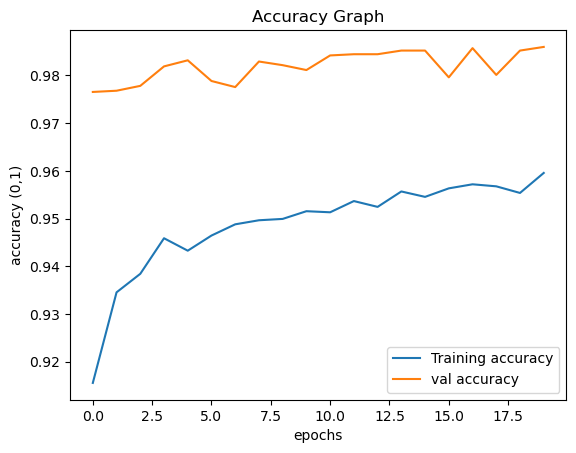

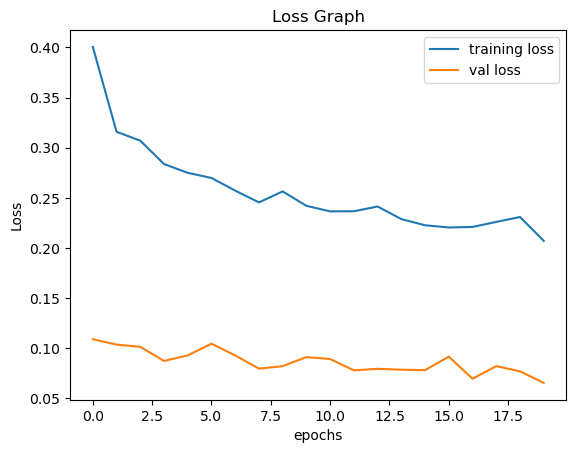

In [23]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy Graph")
plt.xlabel("epochs")
plt.ylabel("accuracy (0,1)")
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss Graph")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [45]:
optimizer = RMSprop(lr=0.01)
model.compile(loss="categorical_crossentropy", optimizer= optimizer, metrics=["accuracy"])

In [46]:
epochs = 20
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
552/552 [==============================] - 72s 127ms/step - loss: 1.9166 - accuracy: 0.4988 - val_loss: 0.4192 - val_accuracy: 0.8613
Epoch 2/20
552/552 [==============================] - 68s 124ms/step - loss: 0.7331 - accuracy: 0.7902 - val_loss: 0.4446 - val_accuracy: 0.8554
Epoch 3/20
552/552 [==============================] - 67s 121ms/step - loss: 0.7454 - accuracy: 0.8037 - val_loss: 0.3244 - val_accuracy: 0.9046
Epoch 4/20
552/552 [==============================] - 67s 122ms/step - loss: 0.7937 - accuracy: 0.8008 - val_loss: 0.5566 - val_accuracy: 0.8676
Epoch 5/20
552/552 [==============================] - 68s 122ms/step - loss: 0.8427 - accuracy: 0.7914 - val_loss: 1.3041 - val_accuracy: 0.6391
Epoch 6/20
552/552 [==============================] - 66s 119ms/step - loss: 0.8979 - accuracy: 0.7817 - val_loss: 0.5608 - val_accuracy: 0.8312
Epoch 7/20
552/552 [==============================] - 67s 121ms/step - loss: 0.9589 - accuracy: 0.7729 - val_loss: 0.4393 - val_ac

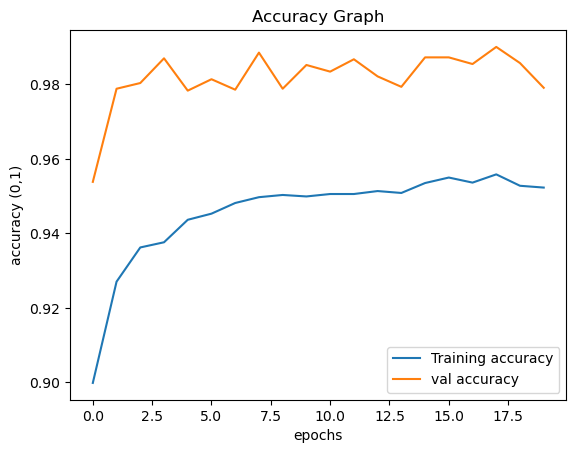

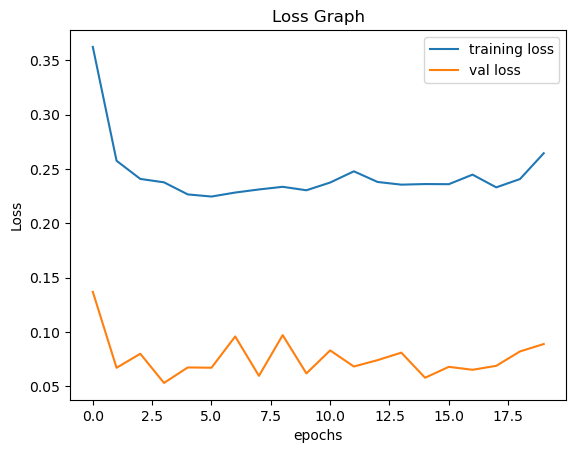

In [43]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy Graph")
plt.xlabel("epochs")
plt.ylabel("accuracy (0,1)")
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss Graph")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [27]:
#building the CNN Model
model = tf.keras.Sequential()

#Adding a Convnet of 32 filters and relu activation
model.add(Conv2D(filters=32, kernel_size=(5,5), activation=LeakyReLU(alpha=0.1), input_shape= x_train.shape[1:]))

#Adding a Convnet of 32 filters and relu activation
model.add((Conv2D(filters=32, kernel_size=(5,5), activation=LeakyReLU(alpha=0.1))))

#Adding a Maxpool Layer of (2,2)
model.add(MaxPool2D(pool_size=(2,2)))

#Adding Dropout Regularization with rate= 0.25
model.add(Dropout(rate=0.25))

#Adding a Convnet of 64 filters and relu activation
model.add((Conv2D(filters=64,kernel_size=(3,3),activation=LeakyReLU(alpha=0.1)))) 

#Adding a MaxPool layer of (2,2)
model.add((MaxPool2D(pool_size=(2,2))))

#Adding a Dropout Regularization with rate = 0.25
model.add(Dropout(rate=0.25))

#Flattening the Model
model.add(Flatten()) 

#Dense layer with Tanh activation
model.add(Dense(256, activation=LeakyReLU(alpha=0.1)))
model.add(Dropout(rate=0.40))

#Final Softmax to categorize the data
model.add(Dense(43, activation="softmax")) 

In [28]:
optimizer = Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer= optimizer, metrics=["accuracy"])

In [29]:
epochs = 20
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
552/552 [==============================] - 76s 136ms/step - loss: 0.9939 - accuracy: 0.7183 - val_loss: 0.1335 - val_accuracy: 0.9628
Epoch 2/20
552/552 [==============================] - 72s 131ms/step - loss: 0.1847 - accuracy: 0.9430 - val_loss: 0.0841 - val_accuracy: 0.9712
Epoch 3/20
552/552 [==============================] - 78s 141ms/step - loss: 0.1104 - accuracy: 0.9652 - val_loss: 0.0387 - val_accuracy: 0.9883
Epoch 4/20
552/552 [==============================] - 72s 131ms/step - loss: 0.0794 - accuracy: 0.9755 - val_loss: 0.0282 - val_accuracy: 0.9923
Epoch 5/20
552/552 [==============================] - 71s 129ms/step - loss: 0.0669 - accuracy: 0.9789 - val_loss: 0.0305 - val_accuracy: 0.9929
Epoch 6/20
552/552 [==============================] - 74s 133ms/step - loss: 0.0568 - accuracy: 0.9814 - val_loss: 0.0234 - val_accuracy: 0.9936
Epoch 7/20
552/552 [==============================] - 67s 121ms/step - loss: 0.0493 - accuracy: 0.9846 - val_loss: 0.0224 - val_ac

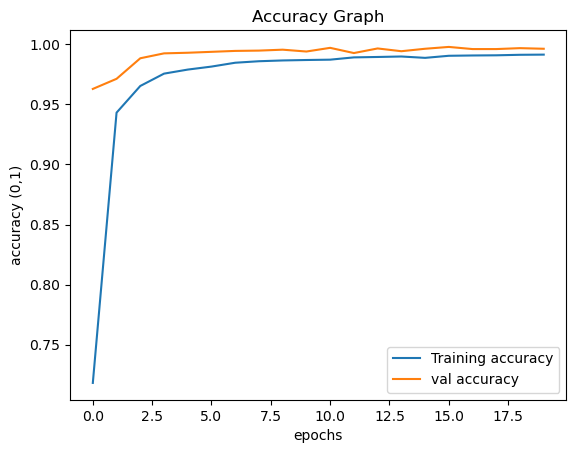

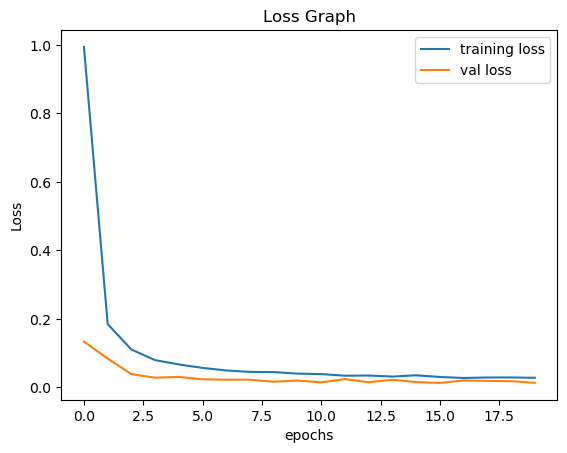

In [30]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy Graph")
plt.xlabel("epochs")
plt.ylabel("accuracy (0,1)")
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss Graph")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import accuracy_score
test = pd.read_csv("./data/Test.csv")
test_labels = test['ClassId'].values
test_img_path = "./data"
test_imgs = test['Path'].values

test_data = []
test_labels = []

for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)

import warnings
warnings.filterwarnings("ignore")
test_labels = test['ClassId'].values
test_data=preprocess(test_data)
predict_x=model.predict(test_data)
classes_x=np.argmax(predict_x,axis=1)
accuracy=accuracy_score(test_labels,classes_x)
accuracy

395/395 [==============================] - 7s 17ms/step


0.9684085510688836

In [33]:
from sklearn.metrics import classification_report
report = classification_report(test_labels,classes_x, target_names=target_names)

# Print the classification report
print(report)

                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       0.94      0.98      0.96        60
                              Speed limit (30km/h)       0.96      0.98      0.97       720
                              Speed limit (50km/h)       0.96      0.99      0.98       750
                              Speed limit (60km/h)       0.97      0.97      0.97       450
                              Speed limit (70km/h)       0.96      0.98      0.97       660
                              Speed limit (80km/h)       0.97      0.93      0.95       630
                       End of speed limit (80km/h)       1.00      0.77      0.87       150
                             Speed limit (100km/h)       0.97      0.98      0.98       450
                             Speed limit (120km/h)       0.98      0.96      0.97       450
                                        No passing       0.98      1.00      0.

In [34]:
#building the CNN Model
model = tf.keras.Sequential()

#Adding a Convnet of 32 filters and relu activation
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="sigmoid", input_shape= x_train.shape[1:]))

#Adding a Convnet of 32 filters and relu activation
model.add((Conv2D(filters=32, kernel_size=(5,5), activation="sigmoid")))

#Adding a Maxpool Layer of (2,2)
model.add(MaxPool2D(pool_size=(2,2)))

#Adding Dropout Regularization with rate= 0.25
model.add(Dropout(rate=0.25))

#Adding a Convnet of 64 filters and relu activation
model.add((Conv2D(filters=64,kernel_size=(3,3),activation="sigmoid"))) 

#Adding a MaxPool layer of (2,2)
model.add((MaxPool2D(pool_size=(2,2))))

#Adding a Dropout Regularization with rate = 0.25
model.add(Dropout(rate=0.25))

#Flattening the Model
model.add(Flatten()) 

#Dense layer with Tanh activation
model.add(Dense(256, activation="sigmoid"))
model.add(Dropout(rate=0.40))

#Final Softmax to categorize the data
model.add(Dense(43, activation="softmax")) 

In [35]:
optimizer = Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer= optimizer, metrics=["accuracy"])

In [36]:
epochs = 20
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
552/552 [==============================] - 60s 109ms/step - loss: 3.5288 - accuracy: 0.0534 - val_loss: 3.4912 - val_accuracy: 0.0571
Epoch 2/20
552/552 [==============================] - 58s 105ms/step - loss: 2.6836 - accuracy: 0.2664 - val_loss: 1.1388 - val_accuracy: 0.6873
Epoch 3/20
552/552 [==============================] - 69s 125ms/step - loss: 0.8519 - accuracy: 0.7554 - val_loss: 0.4064 - val_accuracy: 0.8926
Epoch 4/20
552/552 [==============================] - 80s 145ms/step - loss: 0.4617 - accuracy: 0.8675 - val_loss: 0.2350 - val_accuracy: 0.9416
Epoch 5/20
552/552 [==============================] - 66s 120ms/step - loss: 0.3195 - accuracy: 0.9099 - val_loss: 0.1635 - val_accuracy: 0.9594
Epoch 6/20
552/552 [==============================] - 72s 130ms/step - loss: 0.2469 - accuracy: 0.9281 - val_loss: 0.1313 - val_accuracy: 0.9640
Epoch 7/20
552/552 [==============================] - 55s 100ms/step - loss: 0.2031 - accuracy: 0.9418 - val_loss: 0.1032 - val_ac

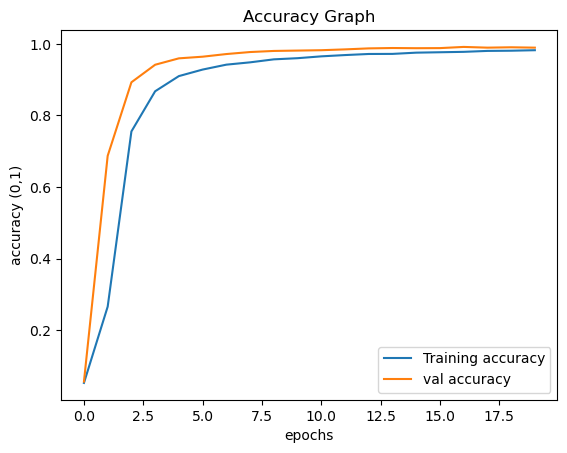

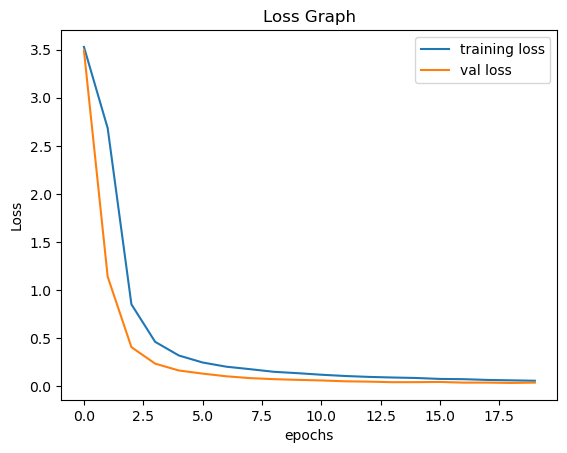

In [37]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy Graph")
plt.xlabel("epochs")
plt.ylabel("accuracy (0,1)")
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss Graph")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import accuracy_score
test = pd.read_csv("./data/Test.csv")
test_labels = test['ClassId'].values
test_img_path = "./data"
test_imgs = test['Path'].values

test_data = []
test_labels = []

for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)

import warnings
warnings.filterwarnings("ignore")
test_labels = test['ClassId'].values
test_data=preprocess(test_data)
predict_x=model.predict(test_data)
classes_x=np.argmax(predict_x,axis=1)
accuracy=accuracy_score(test_labels,classes_x)
accuracy

395/395 [==============================] - 6s 16ms/step


0.9520190023752969

In [39]:
target_names = ['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited','No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals','Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles over 3.5 metric tons']

In [40]:
confusion_matrix = confusion_matrix(test_labels,classes_x)

# Print the confusion matrix
print("Confusion matrix:")
print(confusion_matrix)

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
confusion_matrix.shape

In [ ]:
# Set the size of the figure
plt.figure(figsize=(18, 12))

# plot the heatmap
sns.heatmap(confusion_matrix, annot=True, cmap="Blues",fmt='d')

# set plot labels
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(test_labels,classes_x, target_names=target_names)

# Print the classification report
print(report)